In [146]:
#importing necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
#loading the data
df = pd.read_csv('/content/Amazon Sales data.csv')

In [148]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [149]:
# Get the datatypes of each columns number of records in each column.
column_datatypes = df.dtypes
column_records = df.count()
print("Column Datatypes:")
print(column_datatypes)
print("\nNumber of Records in Each Column:")
print(column_records)


Column Datatypes:
Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

Number of Records in Each Column:
Region            100
Country           100
Item Type         100
Sales Channel     100
Order Priority    100
Order Date        100
Order ID          100
Ship Date         100
Units Sold        100
Unit Price        100
Unit Cost         100
Total Revenue     100
Total Cost        100
Total Profit      100
dtype: int64


In [150]:
#Dropping irrevalent columns
df = df.drop(["Order ID","Ship Date"],axis=1)

In [151]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [152]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [153]:
# Extract month and year from 'Order Date'
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [154]:
# Month-wise sales trend
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

In [155]:
# Year-wise sales trend
yearly_sales = df.groupby('Year')['Total Revenue'].sum()

In [156]:
# Yearly month-wise sales trend
yearly_monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()



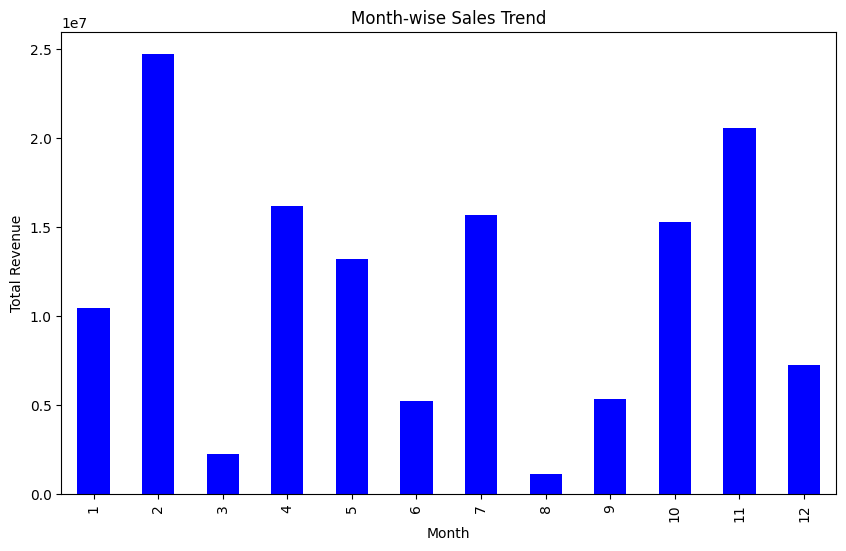

In [157]:
# Plotting month-wise sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='blue')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

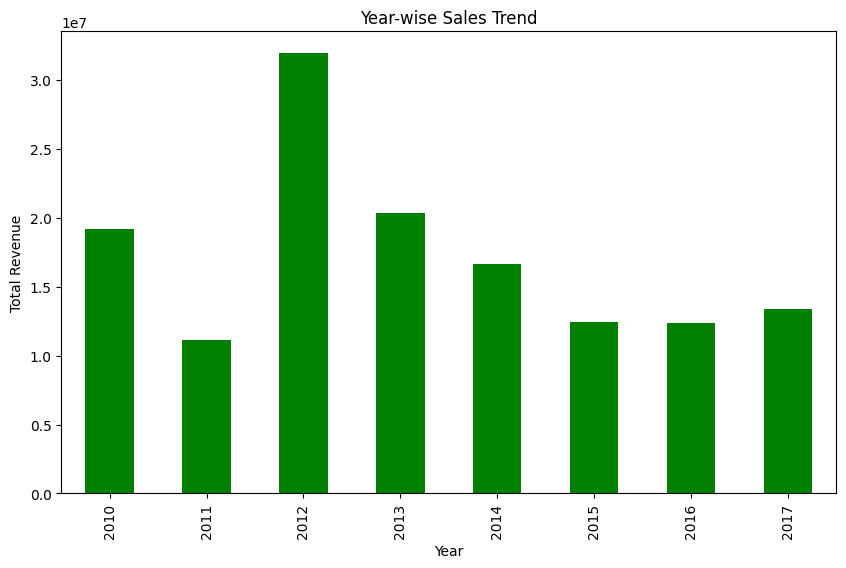

In [158]:
# Plotting year-wise sales trend
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='green')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

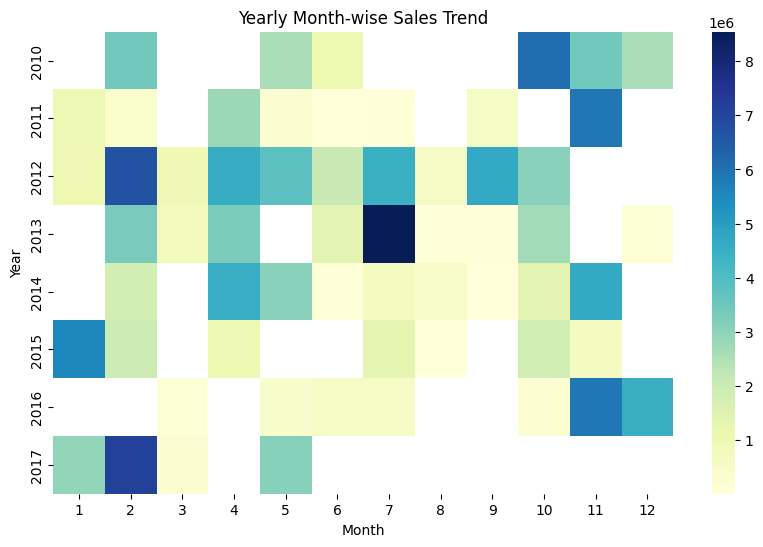

In [159]:

# Plotting yearly month-wise sales trend
plt.figure(figsize=(10, 6))
sns.heatmap(yearly_monthly_sales, cmap='YlGnBu')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [160]:
# Calculate key metrics
total_revenue = df['Total Revenue'].sum()
total_units_sold = df['Units Sold'].sum()
average_selling_price = total_revenue / total_units_sold


In [161]:
# Display key metrics
print(f'Total Revenue: ${total_revenue:.2f}')
print(f'Total Units Sold: {total_units_sold}')
print(f'Average Selling Price: ${average_selling_price:.2f}')


Total Revenue: $137348768.31
Total Units Sold: 512871
Average Selling Price: $267.80


In [162]:

# Calculate correlation between numeric attributes
correlation_matrix = df[['Total Revenue', 'Units Sold', 'Unit Price']].corr()

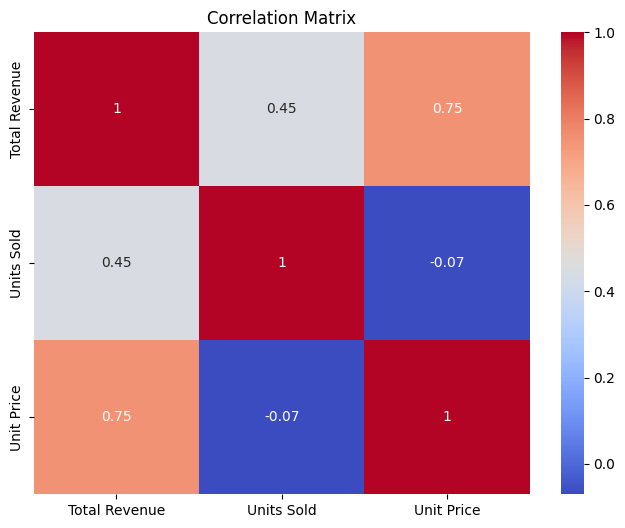

In [163]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [164]:
# Perform customer segmentation analysis
customer_segmentation = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)


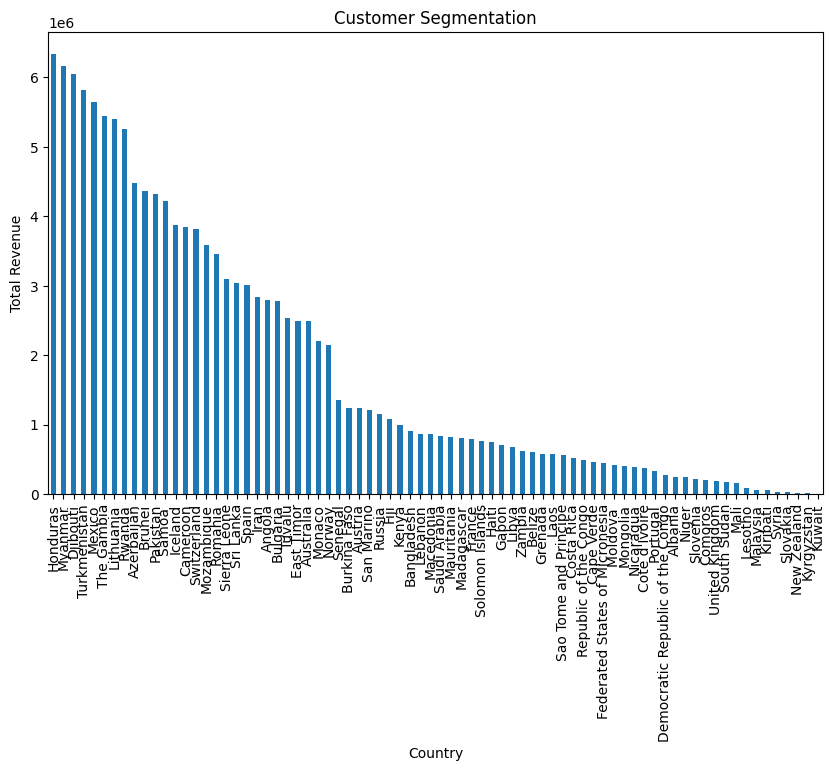

In [165]:
# Visualize customer segmentation
plt.figure(figsize=(10, 6))
customer_segmentation.plot(kind='bar')
plt.title('Customer Segmentation')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

In [166]:
# Perform time series analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

In [167]:
# Resample data to monthly frequency and calculate total revenue
monthly_revenue = df['Total Revenue'].resample('M').sum()


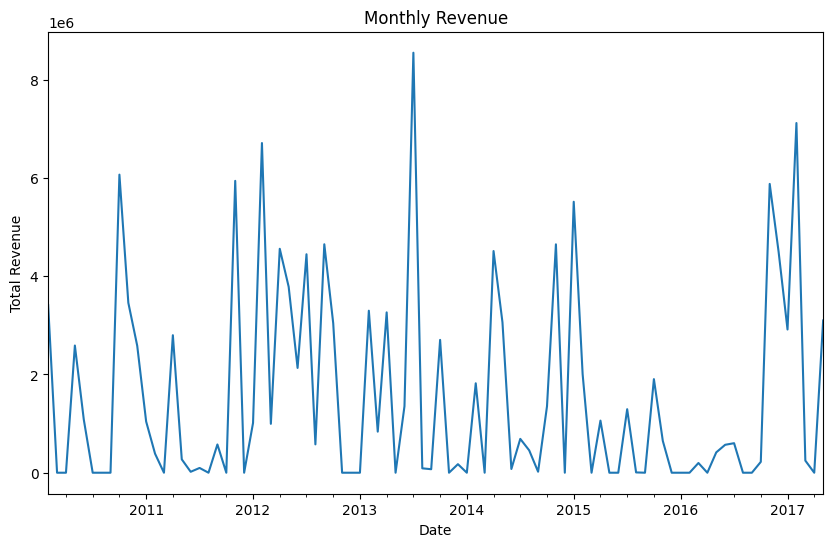

In [168]:
# Visualize time series data
plt.figure(figsize=(10, 6))
monthly_revenue.plot()
plt.title('Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

In [169]:
# Perform marketing campaign analysis
campaign_sales = df.groupby('Sales Channel')['Total Revenue'].sum()


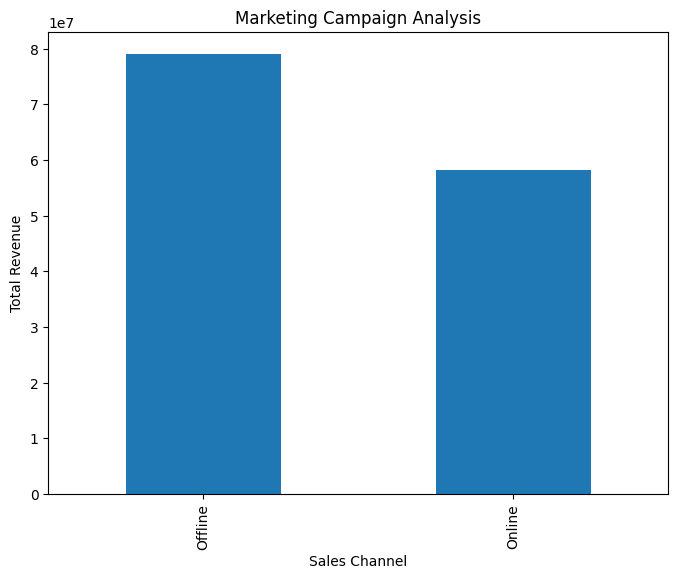

In [170]:
# Visualize marketing campaign analysis
plt.figure(figsize=(8, 6))
campaign_sales.plot(kind='bar')
plt.title('Marketing Campaign Analysis')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()


In [171]:
#Sales by Item Type
sales_by_item_type = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)


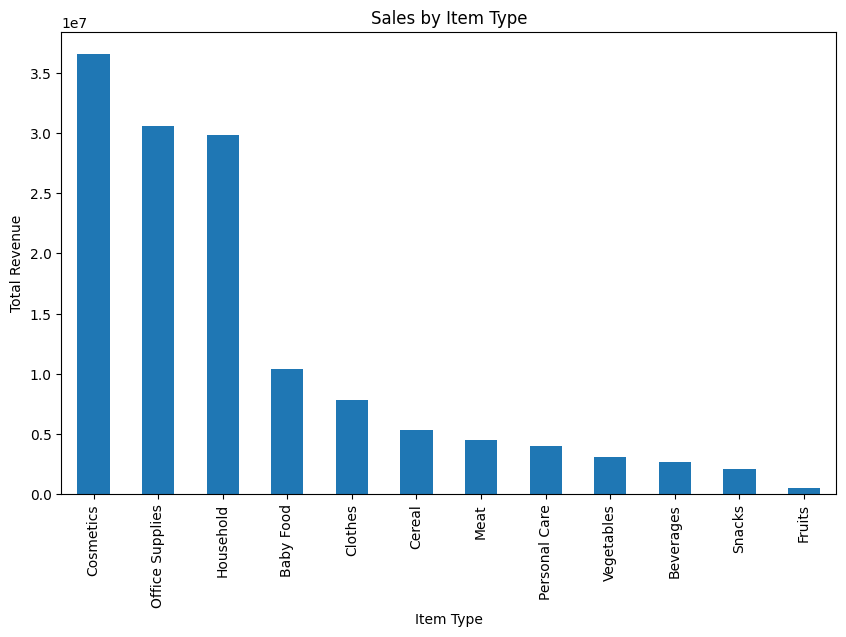

In [172]:
# Visualize sales by item type
plt.figure(figsize=(10, 6))
sales_by_item_type.plot(kind='bar')
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.show()

In [173]:
#Monthly sales by region


monthly_sales_by_region = df.groupby(['Region', 'Month'])['Total Revenue'].sum().unstack()

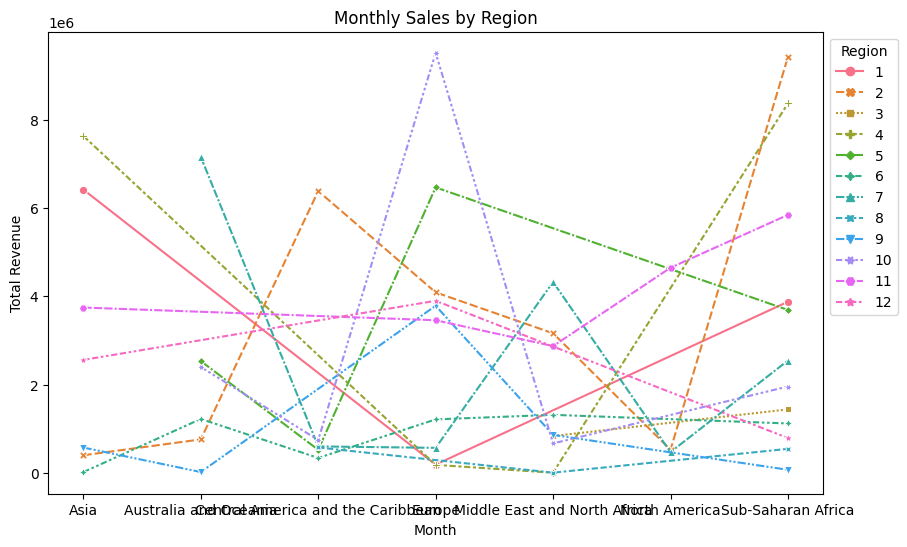

In [174]:
# Visualize monthly sales by region
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales_by_region, markers=True)
plt.title('Monthly Sales by Region')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

In [175]:
#Average selling price by sales channel
average_price_by_channel = df.groupby('Sales Channel')['Unit Price'].mean().sort_values(ascending=False)

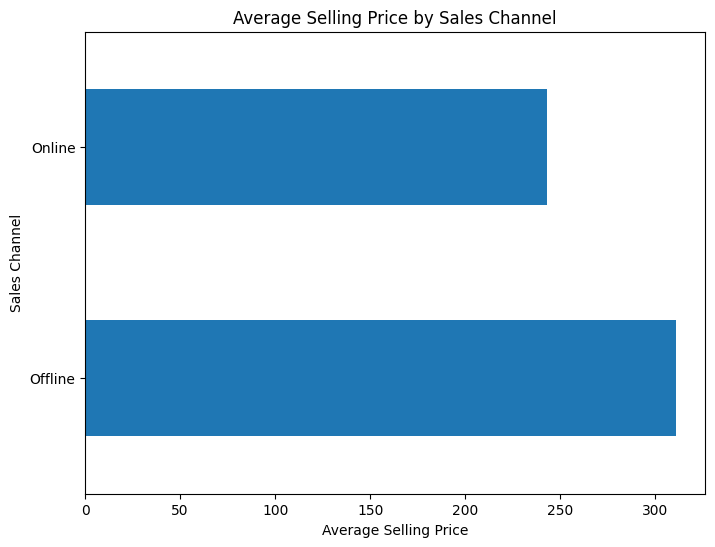

In [176]:
# Visualize average selling price by sales channel
plt.figure(figsize=(8, 6))
average_price_by_channel.plot(kind='barh')
plt.title('Average Selling Price by Sales Channel')
plt.xlabel('Average Selling Price')
plt.ylabel('Sales Channel')
plt.show()

In [177]:
#Revenue distribution by order priority
revenue_by_priority = df.groupby('Order Priority')['Total Revenue'].sum()


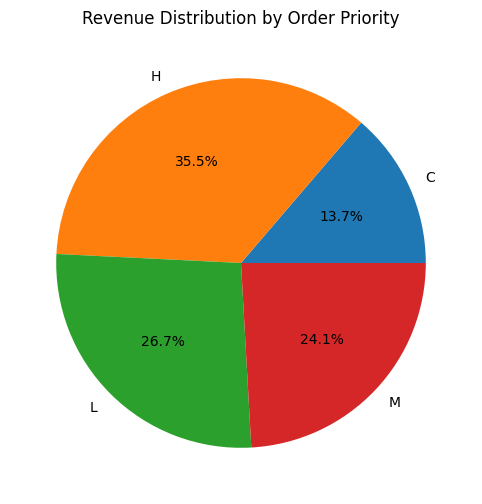

In [178]:
# Visualize revenue distribution by order priority
plt.figure(figsize=(8, 6))
revenue_by_priority.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Distribution by Order Priority')
plt.ylabel('')
plt.show()

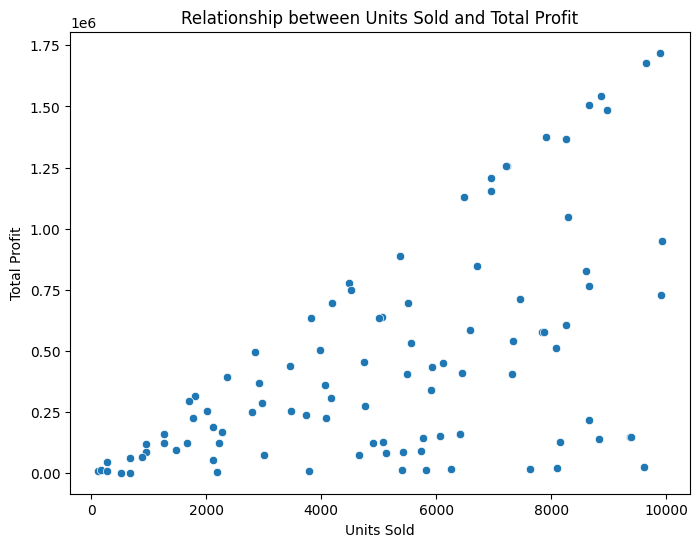

In [179]:
#Relationship between units sold and total profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Units Sold', y='Total Profit')
plt.title('Relationship between Units Sold and Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.show()